In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

In [39]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X = X[y != 2]
y = y[y != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



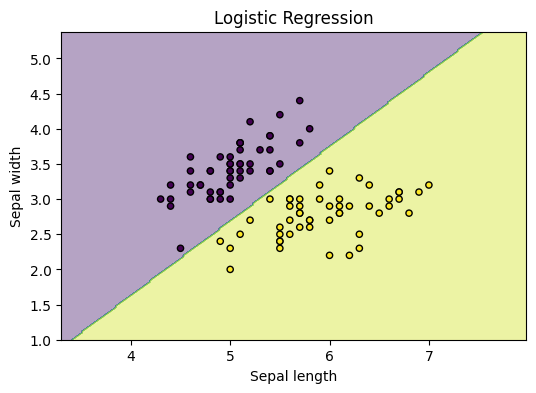

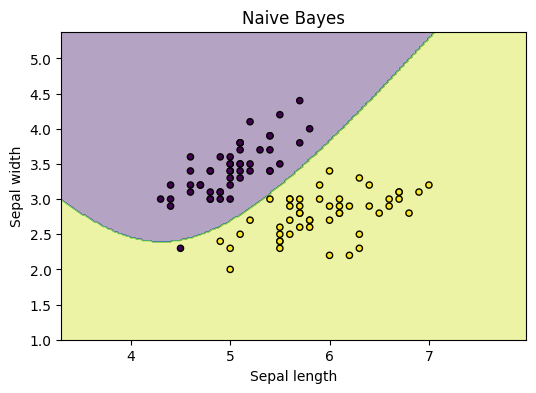

In [42]:
def plot_decision_bounrdaries(model, title):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(6, 4))
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title(title)
  plt.show()
plot_decision_bounrdaries(clf_lr, 'Logistic Regression')
plot_decision_bounrdaries(classifier, 'Naive Bayes')

Naive Bayes Custom

In [43]:
from sklearn.datasets import load_iris
from collections import Counter
class myNBClassifier(object):
  def _init_(self):
    self.means = []
    self.stds = []
  def myGaussian(self, x, mu, sig):
    lhd = 1/(sig * np.sqrt(2 * np.pi))*np.exp(-(x - mu)**2 / (2 * sig**2))
    return lhd
  def fit(self, data, label):
    self.c = list(Counter(y).keys())
    dataset = np.column_stack((data, label))
    for g in self.c:
      segment = dataset[dataset[:, -1] == g][:, :-1]
      f1, f2 = np.hsplit(segment, 2)
      self.means.append([np.round(np.mean(f1),2), np.round(np.mean(f2),2)])
      self.stds.append([np.round(np.std(f1),2), np.round(np.std(f2),2)])
  def predict(self, data):
    fn = data.shape[1]
    my_pred = []
    for row in data:
      likelihood = []
      for l in self.c:
        mus = self.means[l]
        sigs = self.stds[l]
        lkd = 1
        for i in range(fn):
          lkd += self.myGaussian(row[i], mus[i], sigs[i])
        likelihood.append(lkd+np.log(1./len(self.c)))
      my_pred.append(np.argmax(likelihood))
    return np.asarray(my_pred)




In [44]:
import numpy as np
from sklearn.metrics import accuracy_score

# Create an instance of the fixed class
myNB = myNBClassifier()  # Note: corrected spelling

# Fit and predict
myNB.fit(X_train, y_train)
pred = myNB.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, pred) * 100
print("Accuracy of our model: {}%".format(np.round(acc, 2)))


AttributeError: 'myNBClassifier' object has no attribute 'means'

: Explore Gaussian naive bayes scikit-learn documentation and figure out the attributes where mean and variance of learned distributions are stored.

Apply Gaussian naive bayes (10 class classifier) on MNIST data after flattening the data from 28*28 to 784 dimentional data. Use the learned distributions to generate new data points to generate new samples given a class and visulize it as grey scale images